# CME538 - Introduction to Data Science
## Lecture 9.2 - Regularization

### Introduction to Regularization 🛠️

In machine learning, we often face a **bias-variance trade-off**: models can be too simple and underfit (high bias) or too complex and overfit (high variance). Regularization helps manage this balance by adding a penalty for large coefficients in a model, effectively controlling the model’s complexity.

**Why is this important?** Overly complex models (like high-degree polynomials) can fit the training data perfectly but generalize poorly to new data due to overfitting. Regularization techniques like **L2 (Ridge) regression** and **L1 (Lasso) regression** are designed to minimize this problem:
- **L2 (Ridge)**: Penalizes the sum of squared coefficients, shrinking them toward zero.
- **L1 (Lasso)**: Penalizes the sum of absolute coefficients, driving some coefficients to exactly zero (feature selection).

1. [Understanding Overfitting and Model Complexity](#section_1): Visualize the effects of increasing model complexity on performance.
2. [Applying Ridge and Lasso Regularization](#section_2): Explore how Ridge and Lasso work to reduce overfitting.
3. [Tuning Regularization Parameters with Cross-Validation](#section_3): Use cross-validation to find the best regularization strength.


Let’s start with understanding overfitting and model complexity!

<a id='section_1'></a>
## 1. Understanding Overfitting and Model Complexity

In this section, we’ll explore **polynomial regression** by fitting models of varying complexity (different polynomial degrees) to our dataset. This will help us understand the following:
- **Underfitting**: When a model is too simple to capture the underlying trend in the data (high bias).
- **Overfitting**: When a model is too complex and captures noise instead of the actual trend (high variance).

We’ll visualize the impact of different polynomial degrees on the model’s fit to the data. This will set the stage for understanding how **regularization** can help manage overfitting in the next section.

### ELI5: What’s Happening? 🤔

Think of fitting a line through points in a scatter plot:
- **Low-Degree Polynomial** (e.g., degree 1): It might look like a straight line that misses many points, showing a general trend but not specific details (underfitting).
- **High-Degree Polynomial** (e.g., degree 12): It twists and turns, hitting almost every point but may end up capturing noise rather than the true trend (overfitting).

We’ll see this visually as we increase the degree of the polynomial.

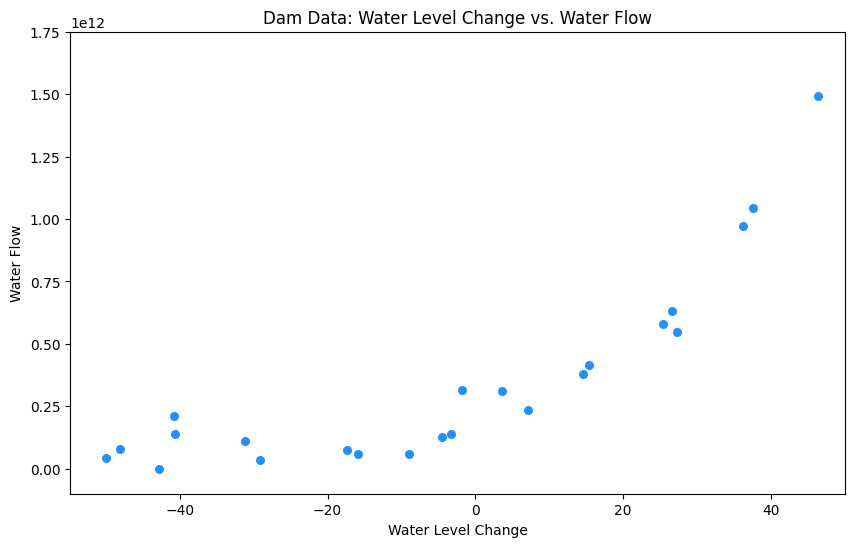

/Users/ali/opt/anaconda3/envs/cme538/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


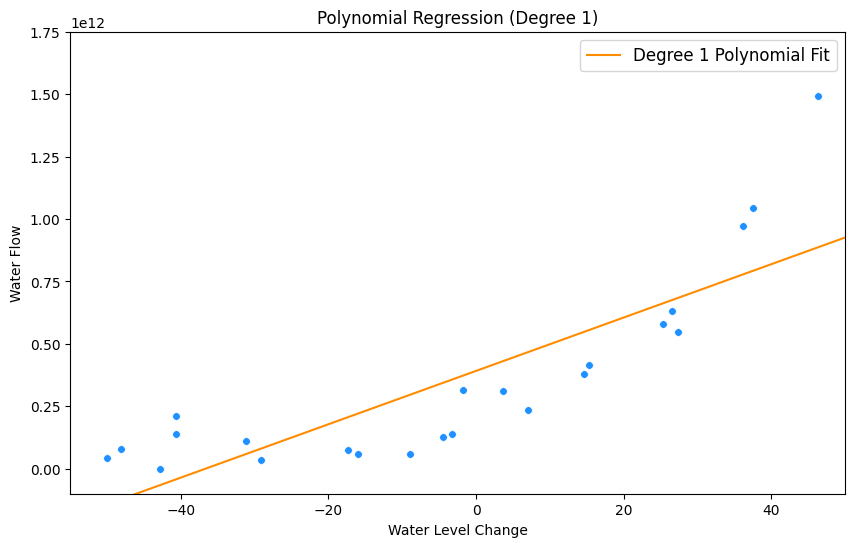

/Users/ali/opt/anaconda3/envs/cme538/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


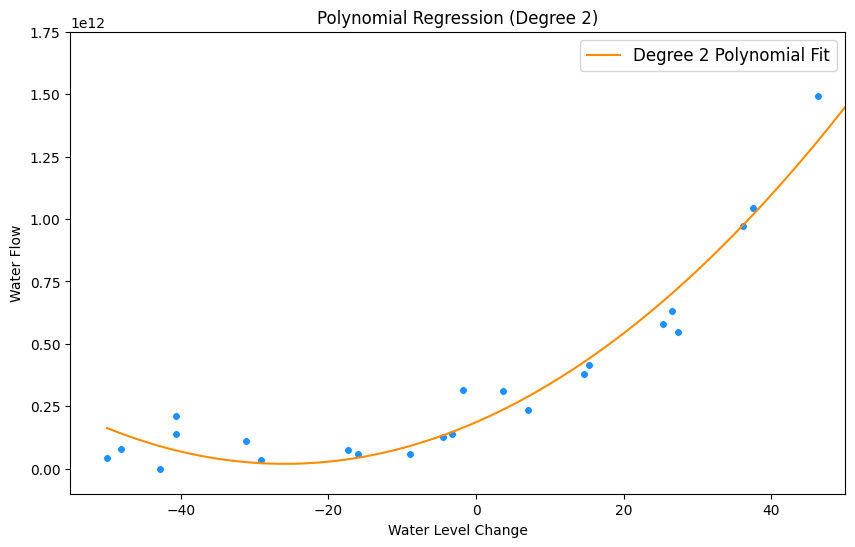

/Users/ali/opt/anaconda3/envs/cme538/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


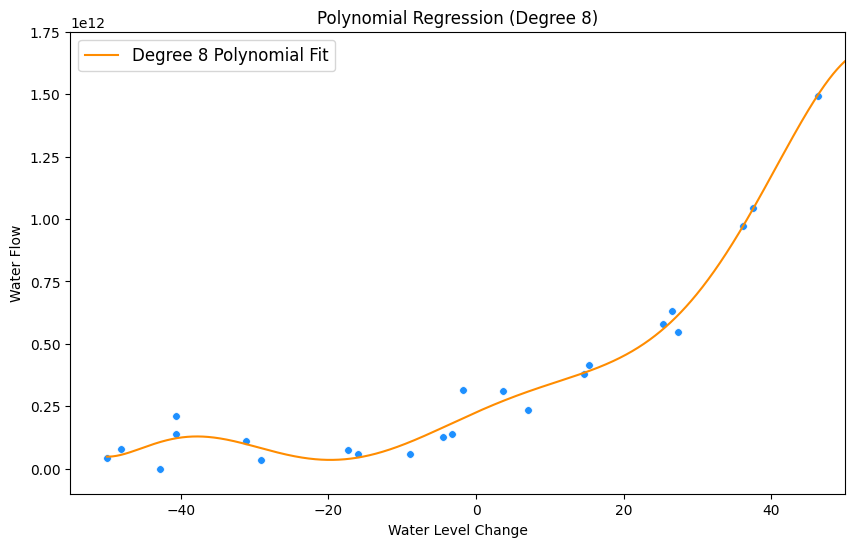

/Users/ali/opt/anaconda3/envs/cme538/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


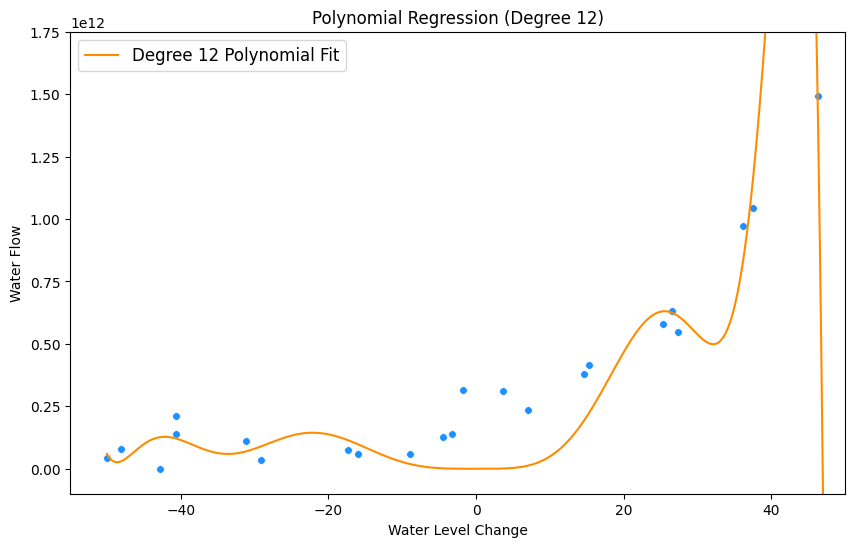

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Load and plot the data
water = pd.read_csv('water_large.csv')
plt.figure(figsize=(10, 6))
plt.scatter(water['water_level_change'], water['water_flow'], color='dodgerblue', s=30)
plt.title("Dam Data: Water Level Change vs. Water Flow")
plt.xlabel("Water Level Change")
plt.ylabel("Water Flow")
plt.xlim([None, 50])
plt.ylim([-0.1e12, 1.75e12])
plt.show()

# Fit polynomial regression models of different degrees
degrees = [1, 2, 8, 12]
for deg in degrees:
    # Transform the data to polynomial features
    trans = PolynomialFeatures(degree=deg)
    X_poly = trans.fit_transform(water[['water_level_change']])
    
    # Fit the polynomial regression model
    model = LinearRegression(fit_intercept=False)
    model.fit(X_poly, water['water_flow'])
    
    # Predict on a range for visualization
    xs = np.linspace(water['water_level_change'].min(), 50, 1000).reshape(-1, 1)
    ys = model.predict(trans.transform(xs))
    
    # Plot the fit
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='water_level_change', y='water_flow', data=water, color="dodgerblue", s=30)
    plt.plot(xs, ys, label=f'Degree {deg} Polynomial Fit', color='darkorange')
    plt.xlabel("Water Level Change")
    plt.ylabel("Water Flow")
    plt.title(f"Polynomial Regression (Degree {deg})")
    plt.legend(fontsize=12)
    plt.xlim([None, 50])
    plt.ylim([-0.1e12, 1.75e12])
    plt.show()

### What Did We Observe? 🤔

Through these polynomial regression plots, we can see how model complexity affects performance:

- **Degree 1**: The linear model (degree 1) demonstrates **high bias**, as it oversimplifies the relationship between water level change and water flow, leading to **underfitting**.
- **Intermediate Degrees (e.g., Degree 2)**: These models start capturing more patterns without fitting noise, balancing **bias and variance** effectively.
- **High Degree (e.g., Degree 12)**: As the degree increases, the model becomes overly complex, capturing fluctuations that might be noise rather than real patterns. This results in **high variance** and **overfitting**.

### Key Takeaway
The relationship between model complexity and performance is a delicate balance. Higher complexity can help in capturing data patterns but risks overfitting if taken too far. This trade-off between underfitting and overfitting is central to the **bias-variance trade-off**. 

In the next section, we’ll introduce **regularization** as a way to manage this trade-off, allowing us to control the complexity of our models while improving generalization to unseen data.

<a id='section_2'></a>
## 2. Introduction to Regularization

**Regularization** is a technique used to improve the generalization of machine learning models, especially those prone to **overfitting**. By adding a penalty to model complexity, regularization methods like **Ridge** and **Lasso** regression can reduce variance while preserving interpretability.

### Why Use Regularization? 🤔

In high-complexity models, like high-degree polynomial regressions, we risk **overfitting**—where the model captures noise rather than the actual data pattern. Regularization discourages extreme coefficient values, making the model less sensitive to noise.

### Types of Regularization 🛠️

1. **Ridge Regression (L2 Regularization)**: Adds a penalty equal to the sum of the squares of the coefficients. This approach keeps all features but shrinks the coefficients, effectively reducing model complexity.
2. **Lasso Regression (L1 Regularization)**: Adds a penalty equal to the sum of the absolute values of the coefficients, potentially setting some coefficients to zero, which leads to simpler models.

We’ll visualize how Ridge and Lasso perform on our **dam data** with polynomial features. This will help us see how regularization can help manage overfitting.

### ELI5: What is Regularization? 🎯

Imagine fitting a curve through noisy data points. Without regularization, the curve might twist and turn excessively to hit every point (overfitting). **Regularization** acts like a weight that pulls the curve back, preventing it from bending too much and keeping it more aligned with the general trend.

### Let’s See Regularization in Action!

/Users/ali/opt/anaconda3/envs/cme538/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/ali/opt/anaconda3/envs/cme538/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.909e+22, tolerance: 3.219e+20
  model = cd_fast.enet_coordinate_descent(
/Users/ali/opt/anaconda3/envs/cme538/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


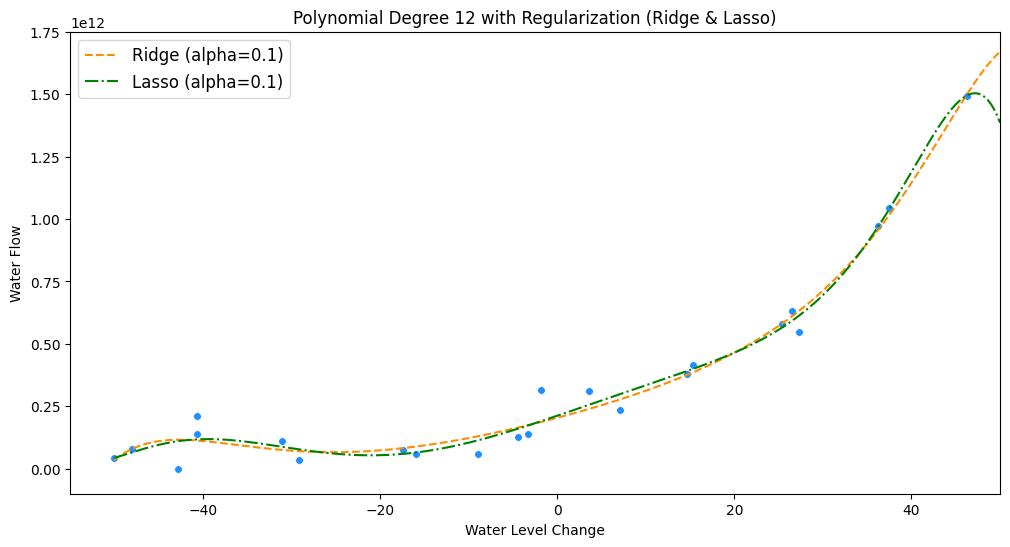

/Users/ali/opt/anaconda3/envs/cme538/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/ali/opt/anaconda3/envs/cme538/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.909e+22, tolerance: 3.219e+20
  model = cd_fast.enet_coordinate_descent(
/Users/ali/opt/anaconda3/envs/cme538/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


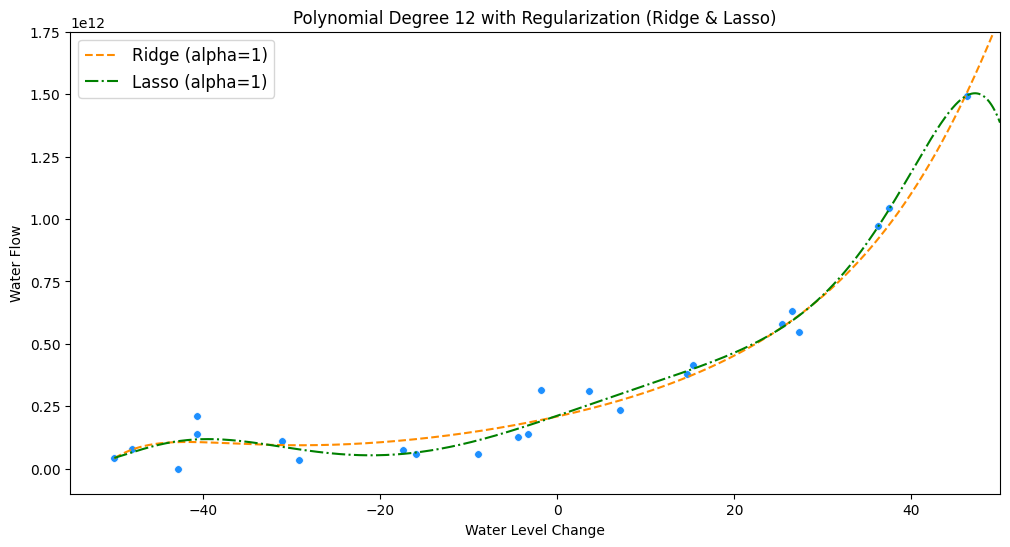

/Users/ali/opt/anaconda3/envs/cme538/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/ali/opt/anaconda3/envs/cme538/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.909e+22, tolerance: 3.219e+20
  model = cd_fast.enet_coordinate_descent(
/Users/ali/opt/anaconda3/envs/cme538/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


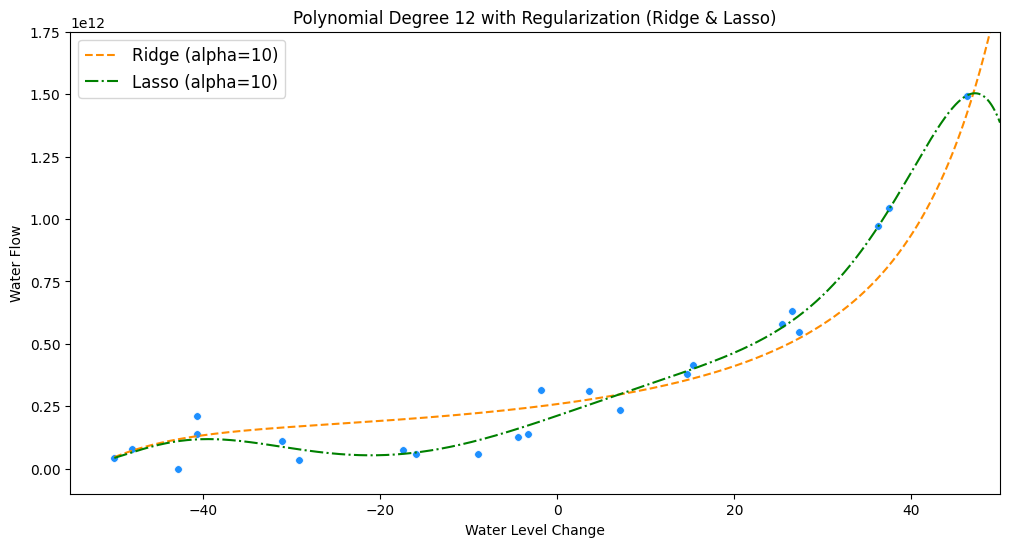

In [5]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Set degree for polynomial features and define plot range
degree = 12
xs = np.linspace(water['water_level_change'].min(), 50, 1000).reshape(-1, 1)

# Ridge and Lasso regularization strength
alphas = [0.1, 1, 10]  # Regularization parameters

for alpha in alphas:
    # Ridge Regression
    ridge = make_pipeline(PolynomialFeatures(degree), StandardScaler(), Ridge(alpha=alpha))
    ridge.fit(water[['water_level_change']], water['water_flow'])
    ys_ridge = ridge.predict(xs)

    # Lasso Regression
    lasso = make_pipeline(PolynomialFeatures(degree), StandardScaler(), Lasso(alpha=alpha))
    lasso.fit(water[['water_level_change']], water['water_flow'])
    ys_lasso = lasso.predict(xs)

    # Plotting results
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='water_level_change', y='water_flow', data=water, color="dodgerblue", s=30)
    plt.plot(xs, ys_ridge, label=f'Ridge (alpha={alpha})', color='darkorange', linestyle='--')
    plt.plot(xs, ys_lasso, label=f'Lasso (alpha={alpha})', color='green', linestyle='-.')
    plt.title(f"Polynomial Degree {degree} with Regularization (Ridge & Lasso)")
    plt.xlabel("Water Level Change")
    plt.ylabel("Water Flow")
    plt.legend(fontsize=12)
    plt.xlim([None, 50])
    plt.ylim([-0.1e12, 1.75e12])
    plt.show()

### Understanding Regularization 🤔

In this section, we explored how **Ridge** and **Lasso** regularization techniques help manage overfitting by penalizing model complexity:

- **Ridge (L2)**: Shrinks coefficients without setting them to zero, reducing variance while retaining all features. This approach is effective when every feature contributes meaningfully but the model risks overfitting.
- **Lasso (L1)**: Reduces some coefficients to zero, performing feature selection in addition to reducing variance. This approach is ideal when only a subset of features is truly informative.

### Key Takeaway

Regularization acts as a **guardrail** for complex models, preventing them from straying too far and fitting noise. By adjusting the regularization parameter \(\alpha\), we can control the strength of this guardrail: higher values lead to more regularization, helping us find a balance between **bias** and **variance**.

### Moving Forward

In the next section, we’ll explore ways to fine-tune regularization for optimal model performance and apply these techniques in diverse contexts.

<a id='section_3'></a>
## 3. Regularization Techniques Comparison: Ridge vs. Lasso

In this section, we’ll explore how **Ridge** and **Lasso** regularization manage overfitting in polynomial regression models. Both techniques penalize large coefficients, but in different ways:
- **Ridge Regression** (L2 regularization) penalizes the sum of squared coefficients, leading to smaller weights but often keeping most features.
- **Lasso Regression** (L1 regularization) penalizes the sum of absolute coefficients, often driving some weights to zero, effectively performing feature selection.

We’ll test various `alpha` values to observe the effect of stronger or weaker regularization on the model’s ability to fit the data.

### ELI5: Why Adjusting `alpha` Matters 🎯
Imagine using a pen to trace a line. 
- A **small `alpha`** lets you trace exactly, but every wobble shows up (overfitting).
- A **large `alpha`** is like using a thicker, stiffer pen, smoothing out the line but potentially missing details (underfitting).

Let’s see it in action by visualizing Ridge and Lasso fits for different `alpha` values.

/Users/ali/opt/anaconda3/envs/cme538/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/ali/opt/anaconda3/envs/cme538/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.830e+22, tolerance: 3.219e+20
  model = cd_fast.enet_coordinate_descent(
/Users/ali/opt/anaconda3/envs/cme538/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


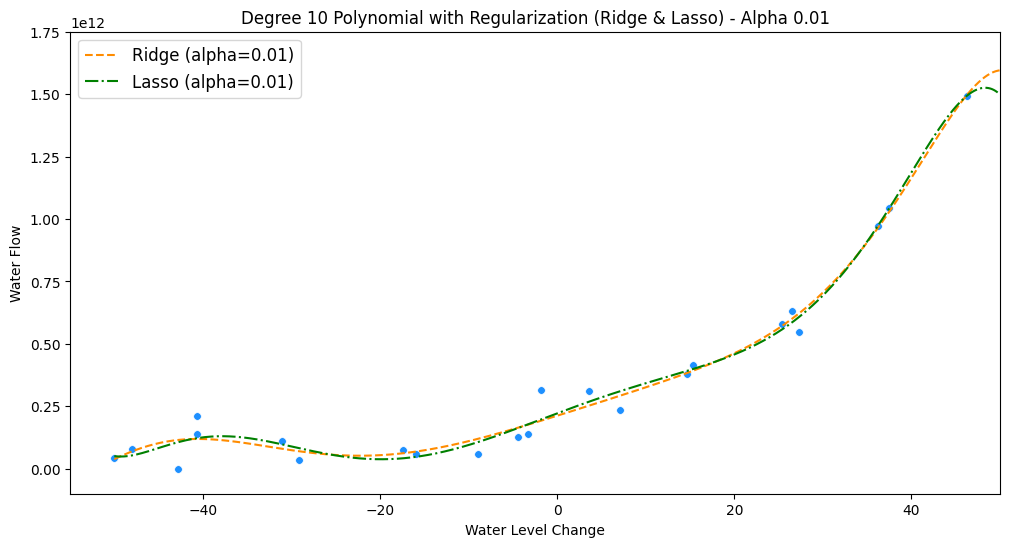

/Users/ali/opt/anaconda3/envs/cme538/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/ali/opt/anaconda3/envs/cme538/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.830e+22, tolerance: 3.219e+20
  model = cd_fast.enet_coordinate_descent(
/Users/ali/opt/anaconda3/envs/cme538/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


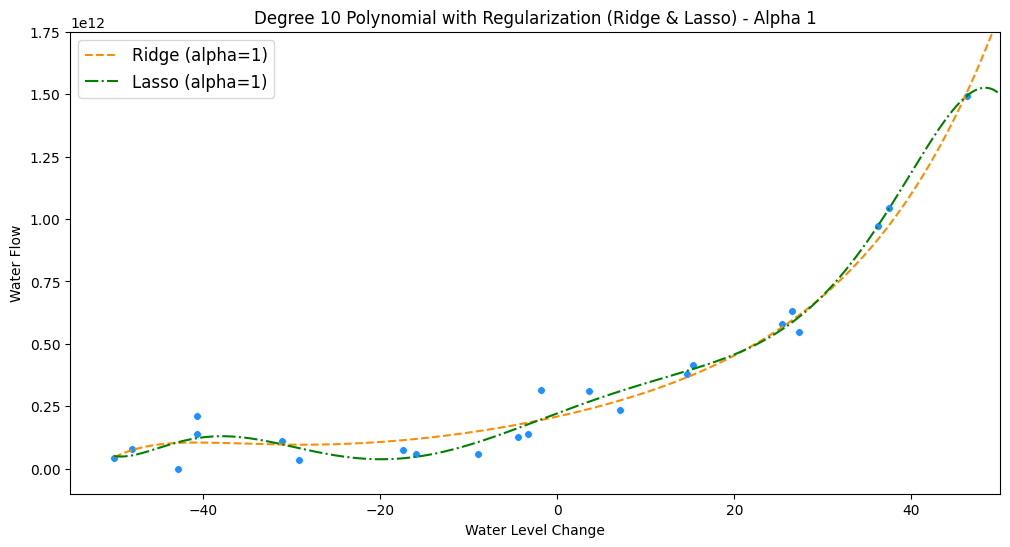

/Users/ali/opt/anaconda3/envs/cme538/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/ali/opt/anaconda3/envs/cme538/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.830e+22, tolerance: 3.219e+20
  model = cd_fast.enet_coordinate_descent(
/Users/ali/opt/anaconda3/envs/cme538/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


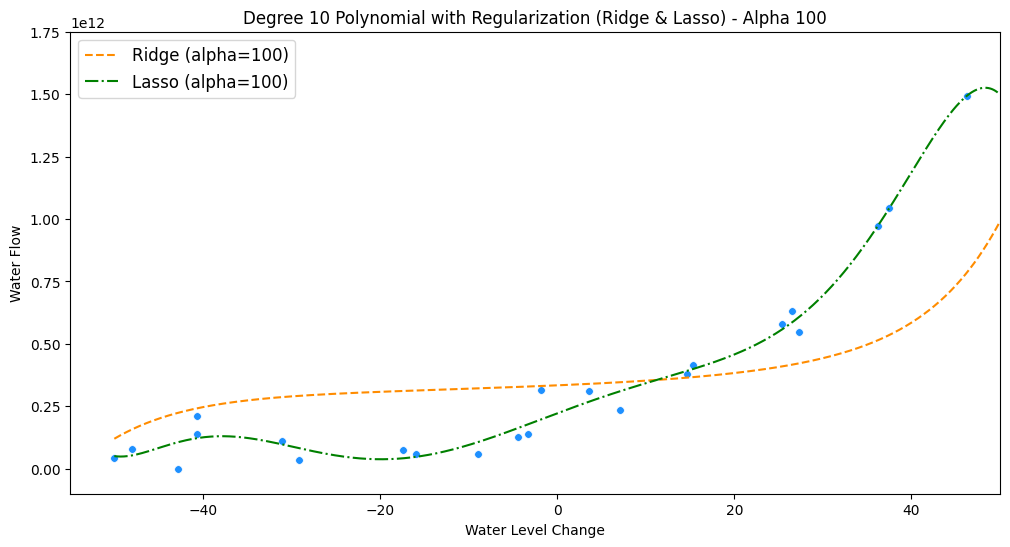

In [6]:
# Setup: Define the degree of polynomial and range for alpha values
degree = 10
alpha_values = [0.01, 1, 100]  # Test low, medium, and high regularization strengths

# Plot Ridge and Lasso fits for various alpha values
for alpha in alpha_values:
    # Ridge regularization with polynomial features
    ridge_pipeline = make_pipeline(
        PolynomialFeatures(degree, include_bias=False),
        StandardScaler(),
        Ridge(alpha=alpha)
    )
    ridge_pipeline.fit(water[['water_level_change']], water['water_flow'])
    ridge_predictions = ridge_pipeline.predict(xs)

    # Lasso regularization with polynomial features
    lasso_pipeline = make_pipeline(
        PolynomialFeatures(degree, include_bias=False),
        StandardScaler(),
        Lasso(alpha=alpha, max_iter=10000)
    )
    lasso_pipeline.fit(water[['water_level_change']], water['water_flow'])
    lasso_predictions = lasso_pipeline.predict(xs)

    # Plot each fit for Ridge and Lasso
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='water_level_change', y='water_flow', data=water, color="dodgerblue", s=30)
    plt.plot(xs, ridge_predictions, label=f'Ridge (alpha={alpha})', color='darkorange', linestyle='--')
    plt.plot(xs, lasso_predictions, label=f'Lasso (alpha={alpha})', color='green', linestyle='-.')
    plt.title(f"Degree {degree} Polynomial with Regularization (Ridge & Lasso) - Alpha {alpha}")
    plt.xlabel("Water Level Change")
    plt.ylabel("Water Flow")
    plt.legend(fontsize=12)
    plt.xlim([None, 50])
    plt.ylim([-0.1e12, 1.75e12])
    plt.show()

### Key Takeaways 📝

As seen in the visualizations above:
- **Low `alpha` (Minimal Regularization)**: The model closely fits the data, capturing details but potentially overfitting (high variance).
- **High `alpha` (Strong Regularization)**: The model is more constrained, leading to smoother, simpler predictions that avoid overfitting but may underfit (high bias).

Ridge keeps most features but reduces their influence, whereas Lasso can zero out less important features, effectively simplifying the model further. This highlights how **regularization provides a way to control model complexity**—a crucial tool for managing bias and variance.

In the final section, we’ll review when and how to apply these regularization techniques in real-world situations. 

# CME538 - Introduction to Data Science
## Lecture 9.2 - Regularization

## Setup Notebook

In [2]:
# Import 3rd party libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

# Import Dam Data

In [4]:
water = pd.read_csv('water_large.csv')
water.head()

,water_level_change,water_flow
0,-15.936758,6.042233e+10
1,-29.152979,3.321490e+10
2,36.189549,9.727064e+11
3,37.492187,1.042883e+12
4,-48.058829,7.952180e+10


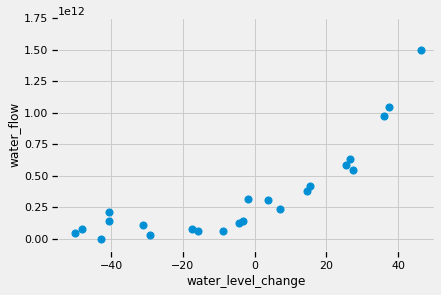

In [28]:
water.plot.scatter(0, 1, s=50)
plt.xlim([None, 50])
plt.ylim([-0.1e12, 1.75e12]);

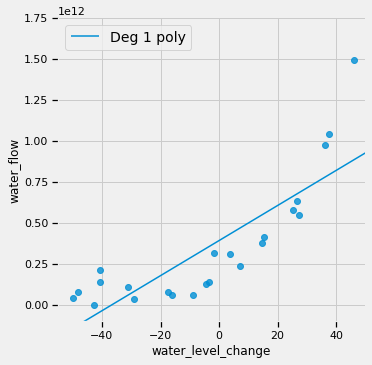

In [24]:
deg = 1
trans = PolynomialFeatures(degree=deg)
X = trans.fit_transform(water[['water_level_change']])
clf = LinearRegression(fit_intercept=False).fit(X, water[['water_flow']])

sns.lmplot(x='water_level_change', y='water_flow', 
           data=water, fit_reg=False)
xs = np.linspace(water[['water_level_change']].min(), 
                 50, 1000).reshape(-1, 1)
ys = clf.predict(trans.transform(xs))
plt.plot(xs, ys, label='Deg {} poly'.format(deg))
plt.legend(fontsize=14, loc=2)
plt.xlim([None, 50])
plt.ylim([-0.1e12, 1.75e12]);

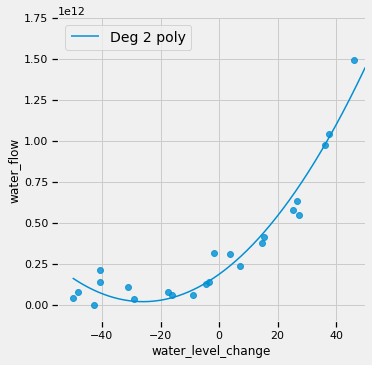

In [25]:
deg = 2
trans = PolynomialFeatures(degree=deg)
X = trans.fit_transform(water[['water_level_change']])
clf = LinearRegression(fit_intercept=False).fit(X, water[['water_flow']])

sns.lmplot(x='water_level_change', y='water_flow', 
           data=water, fit_reg=False)
xs = np.linspace(water[['water_level_change']].min(), 
                 50, 1000).reshape(-1, 1)
ys = clf.predict(trans.transform(xs))
plt.plot(xs, ys, label='Deg {} poly'.format(deg))
plt.legend(fontsize=14, loc=2)
plt.xlim([None, 50])
plt.ylim([-0.1e12, 1.75e12]);

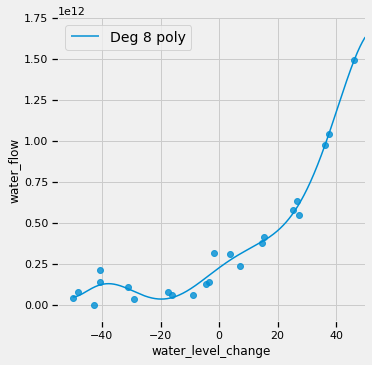

In [26]:
deg = 8
trans = PolynomialFeatures(degree=deg)
X = trans.fit_transform(water[['water_level_change']])
clf = LinearRegression(fit_intercept=False).fit(X, water[['water_flow']])

sns.lmplot(x='water_level_change', y='water_flow', 
           data=water, fit_reg=False)
xs = np.linspace(water[['water_level_change']].min(), 
                 50, 1000).reshape(-1, 1)
ys = clf.predict(trans.transform(xs))
plt.plot(xs, ys, label='Deg {} poly'.format(deg))
plt.legend(fontsize=14, loc=2)
plt.xlim([None, 50])
plt.ylim([-0.1e12, 1.75e12]);

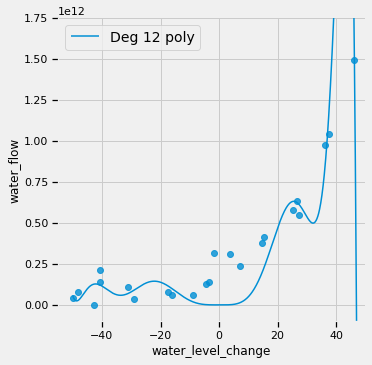

In [27]:
deg = 12
trans = PolynomialFeatures(degree=deg)
X = trans.fit_transform(water[['water_level_change']])
clf = LinearRegression(fit_intercept=False).fit(X, water[['water_flow']])

sns.lmplot(x='water_level_change', y='water_flow', 
           data=water, fit_reg=False)
xs = np.linspace(water[['water_level_change']].min(), 
                 50, 1000).reshape(-1, 1)
ys = clf.predict(trans.transformwwww(xs))
plt.plot(xs, ys, label='Deg {} poly'.format(deg))
plt.legend(fontsize=14, loc=2)
plt.xlim([None, 50])
plt.ylim([-0.1e12, 1.75e12]);